In [1]:
from backpack_state import Backpack
from offspring import Offsrping
import numpy as np

In [215]:
P = np.array([10, 7, 25, 8, 8, 28, 11, 15, 14, 15, 24, 23])
W = np.array([8, 5, 6, 1, 15, 18, 6, 10, 7, 12, 9, 18])
w = 70
N = 15


backpack = Backpack(W, P, w, N)
backpack.initial_generate_offsprings()
# for i in backpack.offsprings:
#     print(i.get_weight(backpack.W), end=' ')
print('Starting state')
print(backpack)

for i in range(5):
    backpack.generate_offsprings()

    backpack.reanimate()

    backpack.mutate()

    backpack.reanimate()

    #backpack.local_upgrade()

    backpack.leave_best_offsprings()

    print('Iteration #{}\n'.format(i+1))
    print(backpack)


Starting state
Metrics = 100 State([1 1 1 1 1 1 0 0 1 0 0 0])
Metrics = 77 State([1 1 0 0 1 1 0 0 0 0 1 0])
Metrics = 83 State([0 0 1 0 1 0 1 0 0 1 1 0])
Metrics = 104 State([1 1 1 0 1 0 0 1 0 1 1 0])
Metrics = 60 State([0 1 0 0 0 0 0 1 0 1 0 1])
Metrics = 124 State([1 0 1 1 1 0 1 1 0 0 1 1])
Metrics = 139 State([0 1 0 1 1 1 1 1 0 1 1 1])
Metrics = 63 State([0 1 1 1 1 0 0 1 0 0 0 0])
Metrics = 102 State([0 0 0 0 0 0 1 1 1 1 1 1])
Metrics = 133 State([1 0 0 1 0 1 1 1 1 0 1 1])
Metrics = 85 State([0 1 1 0 0 0 0 1 1 0 1 0])
Metrics = 116 State([1 0 1 0 0 1 0 1 1 0 1 0])
Metrics = 48 State([0 0 1 1 0 0 0 1 0 0 0 0])
Metrics = 79 State([1 0 1 1 1 1 0 0 0 0 0 0])
Metrics = 41 State([0 1 0 0 1 0 1 1 0 0 0 0])

Iteration #1

Metrics = 79 State([1 0 1 1 1 1 0 0 0 0 0 0])
Metrics = 85 State([0 1 1 0 0 0 0 1 1 0 1 0])
Metrics = 89 State([1 1 1 0 1 0 0 0 0 1 1 0])
Metrics = 91 State([0 0 1 1 1 0 1 0 0 1 1 0])
Metrics = 91 State([0 1 1 1 1 1 0 1 0 0 0 0])
Metrics = 100 State([1 1 1 1 1 1 0 0 1 0 0 

In [217]:
L = 75
P = np.random.randint(5, 30, L)
W = np.random.randint(2, 25, L)
w = int(L * 0.3 * W.mean())
N = int(0.666 * L)

In [218]:
N

49

In [4]:
w, P, W

(297,
 array([26, 29, 27, 20, 25, 23, 17, 28, 22,  9, 27, 24, 15,  9, 15, 11, 25,
        20, 28, 20, 26, 23, 17, 10, 16, 29,  9, 11,  8,  7, 11,  5, 21, 16,
        21,  7, 13, 11,  8, 25, 22,  6, 20, 12, 16, 21, 25, 12,  5, 27, 19,
         9, 21, 17, 20, 22,  9, 17,  6, 26, 11, 13,  5, 20, 28, 12,  7, 15,
         8, 12, 13, 22, 16, 27, 15]),
 array([ 2,  5, 19,  9, 14,  7,  9, 24,  2, 15, 21, 10,  9, 22,  9, 12, 17,
         9, 14,  7,  9, 24, 16,  7, 17,  2,  9, 24, 11,  6,  9,  9, 10, 10,
        18,  3, 17,  7, 15, 16, 18,  5,  3, 18, 19, 23, 13, 14, 17, 18,  9,
        24,  6, 16,  8,  3, 15, 20, 12, 23, 19, 21, 13,  9, 22, 18, 23,  4,
        19,  9, 15, 14, 15,  9, 22]))

In [5]:
stats_recorder = []

In [6]:
backpack = Backpack(W, P, w, N)
backpack.initial_generate_offsprings()
#print('Starting state')
stats_recorder.append(backpack.generation_stats())
#print(stats_recorder[0])

for i in range(20):
    backpack.generate_offsprings()

    backpack.reanimate()

    backpack.mutate()

    backpack.reanimate()

    backpack.local_upgrade()

    backpack.leave_best_offsprings()

    #print('Iteration #{}\n'.format(i+1))
    stats_recorder.append(backpack.generation_stats())
#    print(stats_recorder[i+1])


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

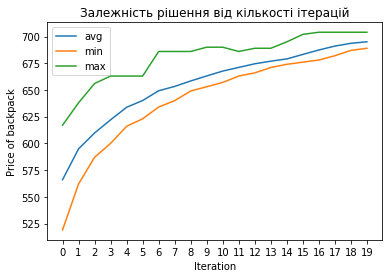

In [8]:
avg_prices = []
min_prices = []
max_prices = []
for i in stats_recorder[1:]:
    avg_prices.append(i['avg_price'])
    min_prices.append(i['min_price'])
    max_prices.append(i['max_price'])
    
plt.plot(avg_prices);
plt.plot(min_prices);
plt.plot(max_prices);
plt.title('Залежність рішення від кількості ітерацій')
plt.xlabel('Iteration')
plt.ylabel('Price of backpack')
plt.xticks(range(20))
plt.legend(['avg', 'min', 'max']);

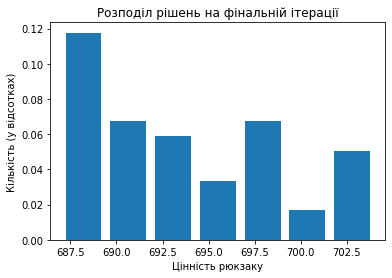

In [14]:
plt.hist(stats_recorder[19]['metrics'], density=True, bins=7, rwidth=0.8)
plt.title('Розподіл рішень на фінальній ітерації')
plt.ylabel('Кількість (у відсотках)')
plt.xlabel('Цінність рюкзаку');

In [42]:
def vector_to_int(vect):
    m = np.geomspace(1, 2**(len(vect) - 1), len(vect))
    return int(np.ceil((vect * m).sum()))

In [169]:
L = 5
P = np.random.randint(5, 10, L)
W = np.random.randint(2, 5, L)
w = 40
N = 1

import itertools
lst = list(itertools.product([0, 1], repeat=L))
history = []
func_val = []

for i in lst:
    func_val.append(vector_to_int(i))


In [170]:
backpack = Backpack(W, P, w, N)
backpack.initial_generate_offsprings()
history = []
history_values = []

for i in range(5):
    backpack.generate_offsprings()

    backpack.reanimate()

    backpack.mutate()

    backpack.reanimate()

    #backpack.local_upgrade()
    

    backpack.leave_best_offsprings()
    #print([off.X for off in backpack.offsprings])
    history.append(
        [vector_to_int(off.X) for off in backpack.offsprings]
    )
    
    history_values.append(
        [i.count_metrics(backpack.P) for i in backpack.offsprings]
    )

    #print('Iteration #{}\n'.format(i+1))
    #print(backpack)


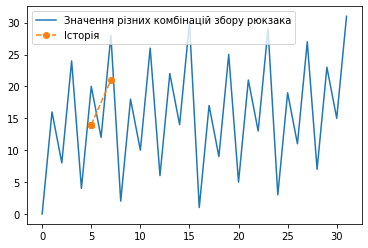

In [198]:
plt.plot(func_val)
plt.plot(history, history_values, marker='o', linestyle='--')
plt.legend(['Значення різних комбінацій збору рюкзака', 'Історія']);
#plt.xlim([min(history[0]),max(history[0])+10])

In [151]:
np.unique(history)

array([30])

[[16, 22, 26], [22, 26, 26], [22, 26, 26]]